In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

logins_df = pd.read_json('logins.json')

logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [8]:
logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
logins_df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [9]:
logins_df = logins_df.resample('15T').sum()
logins_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


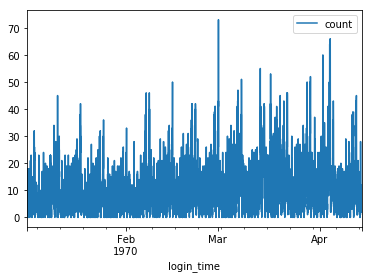

In [13]:
logins_df.plot()
plt.show()

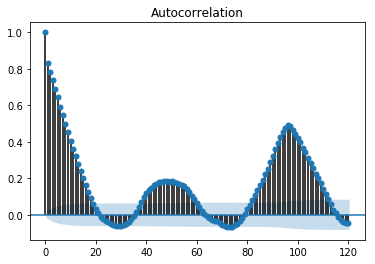

In [22]:
from scipy import signal
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(logins_df, lags=120) #12 hr (lags = 48) and 24 hrs cycles; note the peaks


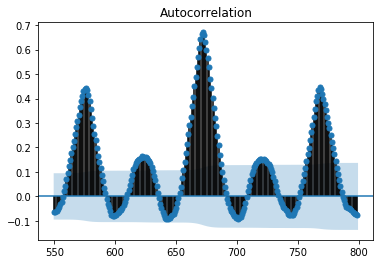

In [23]:
import numpy as np
#weekly cycle (lag=672), also 6 day & 8 days
plot_acf(logins_df, lags=np.arange(550,800))

The number of times a driver crosses the toll bridge can be a useful metric. It can be tested by randmly assigning the drivers and predict the receiving of promotion by the crsooing numbers. 

In [24]:
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [25]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [30]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [31]:
numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

categorical_features = ['city', 'phone', 'ultimate_black_user']

In [32]:
df = df[np.abs(df['avg_dist']-df['avg_dist'].mean())<=(3*df['avg_dist'].std())]
df = df[np.abs(df['avg_rating_by_driver']-df['avg_rating_by_driver'].mean())<=(3*df['avg_rating_by_driver'].std())]
df = df[np.abs(df['avg_rating_of_driver']-df['avg_rating_of_driver'].mean())<=(3*df['avg_rating_of_driver'].std())]
df = df[np.abs(df['avg_surge']-df['avg_surge'].mean())<=(3*df['avg_surge'].std())]
df = df[np.abs(df['surge_pct']-df['surge_pct'].mean())<=(3*df['surge_pct'].std())]
df = df[np.abs(df['trips_in_first_30_days']-df['trips_in_first_30_days'].mean())<=(3*df['trips_in_first_30_days'].std())]

In [34]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [35]:
df.reset_index(drop=True, inplace=True)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


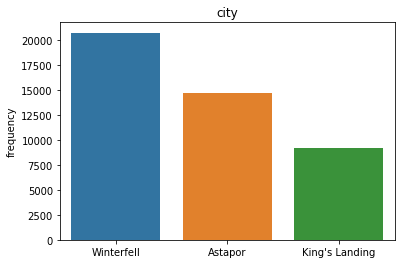

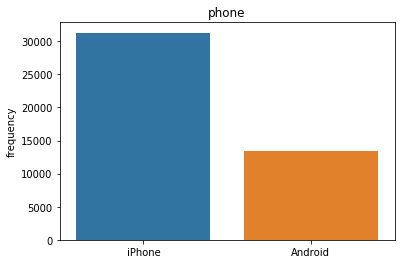

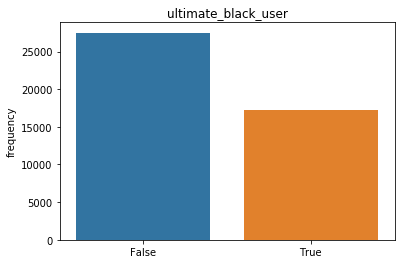

In [37]:
import seaborn as sns
for feature in categorical_features:
    sns.barplot(x = list(df[np.logical_not(df[feature].isnull())][feature].value_counts().index), 
                y = df[np.logical_not(df[feature].isnull())][feature].value_counts())
    plt.title(feature)
    plt.ylabel('frequency')
    plt.show();

In [39]:
corr_matrix = df.corr()
corr_matrix[(abs(corr_matrix) >= 0.50) & (abs(corr_matrix) < 1.0)]
corr_matrix


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,1.000000,-0.058875,0.150471,0.145407,0.082045,0.025849,-0.157064,-0.136598
avg_rating_of_driver,-0.058875,1.000000,-0.030831,-0.012833,-0.011233,0.004661,0.036985,0.108811
avg_surge,0.150471,-0.030831,1.000000,0.849852,-0.016889,-0.091408,-0.125715,-0.054707
surge_pct,0.145407,-0.012833,0.849852,1.000000,-0.035394,-0.103303,-0.141120,-0.045886
ultimate_black_user,0.082045,-0.011233,-0.016889,-0.035394,1.000000,0.021997,0.032364,-0.020618
weekday_pct,0.025849,0.004661,-0.091408,-0.103303,0.021997,1.000000,0.106505,0.019580
avg_dist,-0.157064,0.036985,-0.125715,-0.141120,0.032364,0.106505,1.000000,0.113764
avg_rating_by_driver,-0.136598,0.108811,-0.054707,-0.045886,-0.020618,0.019580,0.113764,1.000000


In [40]:
#Top features are surge_pct and avg_surge
sorted(df['last_trip_date'].unique())[-10:]
print('{:.2f}% of users have taken a trip on or after June 1st, 2014 and are considered \'retained\'.'\
      .format(len(df[df['last_trip_date'] >= '2014-06-01'])/len(df)*100))

38.59% of users have taken a trip on or after June 1st, 2014 and are considered 'retained'.


In [41]:
df['retained'] = np.nan
df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0.0


In [43]:
df.drop('last_trip_date', axis=1, inplace=True)



KeyError: "['last_trip_date'] not found in axis"

In [44]:
df.drop('signup_date', axis=1, inplace=True)

In [45]:
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1.0
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0.0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0.0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1.0
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0.0


In [46]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])

df_encoded.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1.0,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0.0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0.0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1.0,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0.0,0,0,1,1,0,1,0


In [47]:
train, test = train_test_split(df_encoded, test_size=.30, 
                               random_state=42, stratify=df_encoded['retained'])

In [48]:
train.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
1573,2,5.0,1.13,50.0,0.0,2.45,5.0,0.0,1,0,0,1,0,1,0
37169,0,4.6,1.00,0.0,40.0,8.61,5.0,1.0,0,0,1,0,1,0,1
649,1,5.0,1.00,0.0,66.7,6.48,5.0,0.0,0,0,1,1,0,0,1
25250,2,3.6,1.00,0.0,100.0,5.27,5.0,0.0,1,0,0,1,0,1,0
27472,0,4.0,1.00,0.0,100.0,3.15,5.0,0.0,0,1,0,0,1,1,0


In [49]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [50]:
from sklearn import cross_validation

target = train['retained']
train = train.drop('retained', axis=1)

clf = DecisionTreeClassifier(max_depth=4)

cv = cross_validation.KFold(len(train), n_folds=10)

cv_count = 1
for traincv, testcv in cv:  
        preds = clf.fit(train.loc[list(traincv),:], 
                        target.loc[list(traincv),]).predict(train.loc[list(testcv),:])
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(target.loc[testcv,], preds)

        print('Round {} CV\nAccuracy: {:.2f}\nAUC: {:.4f}\nConfusion Matrix:\n{}\n\n'\
                  .format(cv_count, accuracy_score(target.loc[testcv,], preds)*100, 
                          auc(false_positive_rate, true_positive_rate),
                          confusion_matrix(target.loc[testcv,], preds)))
        cv_count += 1

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Round 1 CV
Accuracy: 73.90
AUC: 0.7243
Confusion Matrix:
[[1521  412]
 [ 404  790]]


Round 2 CV
Accuracy: 73.90
AUC: 0.7273
Confusion Matrix:
[[1472  397]
 [ 419  839]]


Round 3 CV
Accuracy: 75.38
AUC: 0.7405
Confusion Matrix:
[[1537  390]
 [ 380  820]]


Round 4 CV
Accuracy: 74.64
AUC: 0.7298
Confusion Matrix:
[[1535  370]
 [ 423  799]]


Round 5 CV
Accuracy: 74.22
AUC: 0.7269
Confusion Matrix:
[[1526  396]
 [ 410  795]]


Round 6 CV
Accuracy: 75.31
AUC: 0.7343
Confusion Matrix:
[[1576  364]
 [ 408  779]]


Round 7 CV
Accuracy: 75.18
AUC: 0.7407
Confusion Matrix:
[[1528  416]
 [ 360  822]]


Round 8 CV
Accuracy: 72.20
AUC: 0.7062
Confusion Matrix:
[[1502  449]
 [ 420  755]]


Round 9 CV
Accuracy: 75.46
AUC: 0.7365
Confusion Matrix:
[[1559  340]
 [ 427  800]]


Round 10 CV
Accuracy: 74.38
AUC: 0.7317
Confusion Matrix:
[[1502  410]
 [ 391  823]]




In [51]:
final_clf = clf.fit(train, target)

test_target = test['retained']
test = test.drop('retained', axis=1)

test_preds = final_clf.predict(test)



print('Test set accuracy: {:.2f}\nConfusion Matrix:\n{}'\
          .format(accuracy_score(test_target, test_preds)*100, 
                  confusion_matrix(test_target, test_preds)))

Test set accuracy: 74.11
Confusion Matrix:
[[6479 1750]
 [1719 3452]]


In [53]:
feature_importance = pd.DataFrame(final_clf.feature_importances_).T
feature_importance.columns = list(train.columns)
feature_importance

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0.019828,0.0,0.019549,0.167878,0.0,0.0,0.461056,0.011149,0.217964,0.0,0.0,0.102576,0.0,0.0


It would be best to focus on top predictors: avg rating, city & surge pct.
    CREDIT: vibaskaran (Githiub)